In [2]:
 #Loading Libraries
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model
from sklearn.tree import DecisionTreeClassifier#Model
from sklearn.neural_network import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

In [3]:
# reading the data

train = pd.read_csv('G:/Hackathon/Jantahack/train.csv')
test = pd.read_csv('G:/Hackathon/Jantahack/test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (18359, 14)
Shape of test : (15021, 13)


In [4]:
# fill NaN values
train.fillna(train.mode(), inplace=True)
test.fillna(test.mode(), inplace=True)

In [5]:
#Label Encoding
for f in train.columns:
    if train[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(train[f].values) + list(test[f].values)))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))

In [6]:
train = train.drop(columns = ['enrollee_id','city'])
test = test.drop(columns = ['enrollee_id','city'])

In [7]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (18359, 11)
Shape of y: (18359,)


In [8]:
#Class Balancing
#Oversampling of underrepresented class
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sample, y_sample = smote.fit_sample(x, y)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [9]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_sample, y_sample, test_size = 0.10, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (28681, 11)
Shape of x_valid:  (3187, 11)
Shape of y_train:  (28681,)
Shape of y_valid:  (3187,)


In [10]:
#Logistic Regression Classifer
Log_model=LogisticRegression(penalty='l2', max_iter=1000, class_weight = "balanced")
Log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_pred = Log_model.predict(x_valid)

In [12]:
print('Logistic Regression: Confusion Matrix')
cm_Log = confusion_matrix(y_valid,log_pred)
print(cm_Log)
print('Logistic Regression: Accuracy, F1 Score, AUC'+"\n""{:.2f}".format(accuracy_score(y_valid, log_pred)*100)+'%')
print(f1_score(y_valid,log_pred, average='weighted'))
fpr1, tpr1, thresholds = roc_curve(y_valid,log_pred)
roc_auc_log = auc(fpr1, tpr1)
print(roc_auc_log)
print('\n')

Logistic Regression: Confusion Matrix
[[1063  519]
 [ 712  893]]
Logistic Regression: Accuracy, F1 Score, AUC
61.37%
0.612492049217797
0.6141602766323633




In [20]:
#Random Forest Model

clf_RF = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight=None)
clf_RF.fit(x_train, y_train)
y_pred_RF = clf_RF.predict(x_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


In [21]:
print('Random Forest: Confusion Matrix')
cm_RF = confusion_matrix(y_valid,y_pred_RF)
print(cm_RF)
print('Random Forest: Accuracy, F1 Score, AUC'+"\n""{:.2f}".format(accuracy_score(y_valid, y_pred_RF)*100)+'%')
print(f1_score(y_valid,y_pred_RF, average='weighted'))
fpr1, tpr1, thresholds = roc_curve(y_valid,y_pred_RF)
roc_auc_rfc_RF = auc(fpr1, tpr1)
print(roc_auc_rfc_RF)
print('\n')


Random Forest: Confusion Matrix
[[2291   97]
 [ 370 2023]]
Random Forest: Accuracy, F1 Score, AUC
90.23%
0.902008054768767
0.9023812998688945




In [13]:
#LGBM Model
clf_LGBM=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.01,reg_alpha=0.2,colsample_bytree=0.5)
clf_LGBM.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_valid, y_valid)],eval_metric='accuracy_score' ,early_stopping_rounds=500,verbose=500)
y_pred_LGBM = clf_LGBM.predict(x_valid)
pred_prob=clf_LGBM.predict_proba(x_valid)[:,-1]

Training until validation scores don't improve for 500 rounds.
[500]	training's binary_logloss: 0.25044	valid_1's binary_logloss: 0.254894
[1000]	training's binary_logloss: 0.216229	valid_1's binary_logloss: 0.230085
[1500]	training's binary_logloss: 0.20024	valid_1's binary_logloss: 0.224008
[2000]	training's binary_logloss: 0.188826	valid_1's binary_logloss: 0.221542
[2500]	training's binary_logloss: 0.179233	valid_1's binary_logloss: 0.219813
[3000]	training's binary_logloss: 0.170937	valid_1's binary_logloss: 0.218999
[3500]	training's binary_logloss: 0.16339	valid_1's binary_logloss: 0.218917
Early stopping, best iteration is:
[3339]	training's binary_logloss: 0.165776	valid_1's binary_logloss: 0.218847


In [14]:

print('LightGBM: Confusion Matrix')
cm_LGBM = confusion_matrix(y_valid,y_pred_LGBM)
print(cm_LGBM)
print('LightGBM: Accuracy, F1 Score, AUC'+"\n""{:.2f}".format(accuracy_score(y_valid, y_pred_LGBM)*100)+'%')
print(f1_score(y_valid,y_pred_LGBM, average='weighted'))
fpr1, tpr1, thresholds = roc_curve(y_valid,y_pred_LGBM)
roc_auc_rfc_LGBM = auc(fpr1, tpr1)
print(roc_auc_rfc_LGBM)
print('\n')

LightGBM: Confusion Matrix
[[1574    8]
 [ 240 1365]]
LightGBM: Accuracy, F1 Score, AUC
92.22%
0.921810783779974
0.922705199853492




In [24]:
#GB Model
clf_GB = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001, random_state=42)
clf_GB.fit(x_train, y_train)
y_pred_GB = clf_GB.predict(x_valid)

In [25]:

print('GradientBoost: Confusion Matrix')
cm_GB = confusion_matrix(y_valid,y_pred_GB)
print(cm_GB)
print('GradientBoost: Accuracy, F1 Score, AUC'+"\n""{:.2f}".format(accuracy_score(y_valid, y_pred_GB)*100)+'%')
print(f1_score(y_valid,y_pred_GB, average='weighted'))
fpr1, tpr1, thresholds = roc_curve(y_valid,y_pred_GB)
roc_auc_rfc_GB = auc(fpr1, tpr1)
print(roc_auc_rfc_GB)
print('\n')

GradientBoost: Confusion Matrix
[[2234  154]
 [ 766 1627]]
GradientBoost: Accuracy, F1 Score, AUC
80.76%
0.8043930868718058
0.8077052976261723




In [24]:
# Extra Tree model 
extc = ExtraTreesClassifier(n_estimators=500,max_features= 7,criterion= 'entropy',min_samples_split= 3,
                            max_depth= 30, min_samples_leaf= 8)      
extc.fit(x_train,y_train)          


y_pred_extc_1 = extc.predict_proba(x_valid)[:,1]
y_pred_extc_2 = extc.predict(x_valid)

In [25]:
print('Extra Tree Metrics')
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_valid, y_pred_extc_2)))
print('Accuracy:'+"{:.2f}".format(accuracy_score(y_valid, y_pred_extc_2)*100)+'%')
print('F1-Score:{}'.format(f1_score(y_valid, y_pred_extc_2, average='weighted')))
fpr1, tpr1, thresholds = roc_curve(y_valid, y_pred_extc_2)
roc_auc_rfc_extc = auc(fpr1, tpr1)
print('AUC:{}'.format(roc_auc_rfc_extc))
print('Classification Report'+"\n""{}".format(classification_report(y_valid, y_pred_extc_2)))
print('\n')

Extra Tree Metrics
Confusion Matrix: 
 [[1461  121]
 [ 230 1375]]
Accuracy:88.99%
F1-Score:0.8897633578399858
AUC:0.8901061789367141
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1582
           1       0.92      0.86      0.89      1605

    accuracy                           0.89      3187
   macro avg       0.89      0.89      0.89      3187
weighted avg       0.89      0.89      0.89      3187





In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dtc_predictions=dtc_model.predict(x_valid)
print('Accuracy of the Model -',accuracy_score(y_valid,dtc_predictions))

Accuracy of the Model - 0.842171320991528


In [43]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.005, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_valid)

0:	learn: 0.6906683	total: 127ms	remaining: 2m 6s
1:	learn: 0.6881016	total: 151ms	remaining: 1m 15s
2:	learn: 0.6848120	total: 171ms	remaining: 56.9s
3:	learn: 0.6814403	total: 191ms	remaining: 47.6s
4:	learn: 0.6788238	total: 211ms	remaining: 42.1s
5:	learn: 0.6762595	total: 232ms	remaining: 38.4s
6:	learn: 0.6731730	total: 252ms	remaining: 35.7s
7:	learn: 0.6697910	total: 272ms	remaining: 33.7s
8:	learn: 0.6679618	total: 292ms	remaining: 32.2s
9:	learn: 0.6646179	total: 312ms	remaining: 30.9s
10:	learn: 0.6617873	total: 341ms	remaining: 30.6s
11:	learn: 0.6595142	total: 373ms	remaining: 30.7s
12:	learn: 0.6566676	total: 394ms	remaining: 29.9s
13:	learn: 0.6548406	total: 416ms	remaining: 29.3s
14:	learn: 0.6521895	total: 437ms	remaining: 28.7s
15:	learn: 0.6494376	total: 457ms	remaining: 28.1s
16:	learn: 0.6471901	total: 477ms	remaining: 27.6s
17:	learn: 0.6455743	total: 498ms	remaining: 27.2s
18:	learn: 0.6427903	total: 526ms	remaining: 27.2s
19:	learn: 0.6406717	total: 558ms	remain

168:	learn: 0.4709767	total: 4.46s	remaining: 21.9s
169:	learn: 0.4703553	total: 4.5s	remaining: 22s
170:	learn: 0.4699050	total: 4.53s	remaining: 22s
171:	learn: 0.4691054	total: 4.55s	remaining: 21.9s
172:	learn: 0.4685918	total: 4.57s	remaining: 21.9s
173:	learn: 0.4677810	total: 4.59s	remaining: 21.8s
174:	learn: 0.4670460	total: 4.62s	remaining: 21.8s
175:	learn: 0.4666310	total: 4.65s	remaining: 21.8s
176:	learn: 0.4660929	total: 4.68s	remaining: 21.8s
177:	learn: 0.4656329	total: 4.71s	remaining: 21.7s
178:	learn: 0.4651314	total: 4.73s	remaining: 21.7s
179:	learn: 0.4643993	total: 4.75s	remaining: 21.7s
180:	learn: 0.4638535	total: 4.78s	remaining: 21.6s
181:	learn: 0.4632435	total: 4.8s	remaining: 21.6s
182:	learn: 0.4623554	total: 4.83s	remaining: 21.5s
183:	learn: 0.4616435	total: 4.86s	remaining: 21.5s
184:	learn: 0.4607363	total: 4.88s	remaining: 21.5s
185:	learn: 0.4603270	total: 4.93s	remaining: 21.6s
186:	learn: 0.4598725	total: 4.99s	remaining: 21.7s
187:	learn: 0.4592

330:	learn: 0.3916395	total: 9.71s	remaining: 19.6s
331:	learn: 0.3912341	total: 9.75s	remaining: 19.6s
332:	learn: 0.3909046	total: 9.79s	remaining: 19.6s
333:	learn: 0.3904895	total: 9.81s	remaining: 19.6s
334:	learn: 0.3902325	total: 9.84s	remaining: 19.5s
335:	learn: 0.3898426	total: 9.86s	remaining: 19.5s
336:	learn: 0.3894891	total: 9.88s	remaining: 19.4s
337:	learn: 0.3890894	total: 9.9s	remaining: 19.4s
338:	learn: 0.3887458	total: 9.93s	remaining: 19.4s
339:	learn: 0.3885791	total: 9.95s	remaining: 19.3s
340:	learn: 0.3884137	total: 9.98s	remaining: 19.3s
341:	learn: 0.3882792	total: 10s	remaining: 19.2s
342:	learn: 0.3880605	total: 10s	remaining: 19.2s
343:	learn: 0.3878655	total: 10s	remaining: 19.2s
344:	learn: 0.3873974	total: 10.1s	remaining: 19.1s
345:	learn: 0.3869980	total: 10.1s	remaining: 19.1s
346:	learn: 0.3866436	total: 10.1s	remaining: 19.1s
347:	learn: 0.3864399	total: 10.2s	remaining: 19s
348:	learn: 0.3861815	total: 10.2s	remaining: 19s
349:	learn: 0.3855570	t

489:	learn: 0.3526368	total: 13.5s	remaining: 14.1s
490:	learn: 0.3524512	total: 13.5s	remaining: 14s
491:	learn: 0.3522902	total: 13.5s	remaining: 14s
492:	learn: 0.3521553	total: 13.6s	remaining: 13.9s
493:	learn: 0.3519571	total: 13.6s	remaining: 13.9s
494:	learn: 0.3517386	total: 13.6s	remaining: 13.9s
495:	learn: 0.3516685	total: 13.6s	remaining: 13.8s
496:	learn: 0.3515830	total: 13.6s	remaining: 13.8s
497:	learn: 0.3513045	total: 13.7s	remaining: 13.8s
498:	learn: 0.3511410	total: 13.7s	remaining: 13.8s
499:	learn: 0.3509559	total: 13.7s	remaining: 13.7s
500:	learn: 0.3506590	total: 13.7s	remaining: 13.7s
501:	learn: 0.3505124	total: 13.8s	remaining: 13.7s
502:	learn: 0.3503014	total: 13.8s	remaining: 13.6s
503:	learn: 0.3501694	total: 13.8s	remaining: 13.6s
504:	learn: 0.3498837	total: 13.9s	remaining: 13.6s
505:	learn: 0.3497359	total: 14s	remaining: 13.6s
506:	learn: 0.3496723	total: 14s	remaining: 13.6s
507:	learn: 0.3495816	total: 14s	remaining: 13.6s
508:	learn: 0.3494688	

652:	learn: 0.3283921	total: 17.5s	remaining: 9.29s
653:	learn: 0.3283499	total: 17.5s	remaining: 9.26s
654:	learn: 0.3282677	total: 17.5s	remaining: 9.23s
655:	learn: 0.3282062	total: 17.5s	remaining: 9.2s
656:	learn: 0.3281467	total: 17.6s	remaining: 9.17s
657:	learn: 0.3280458	total: 17.6s	remaining: 9.14s
658:	learn: 0.3280004	total: 17.6s	remaining: 9.11s
659:	learn: 0.3279152	total: 17.6s	remaining: 9.08s
660:	learn: 0.3277575	total: 17.6s	remaining: 9.05s
661:	learn: 0.3275880	total: 17.7s	remaining: 9.02s
662:	learn: 0.3274469	total: 17.7s	remaining: 8.99s
663:	learn: 0.3273515	total: 17.7s	remaining: 8.96s
664:	learn: 0.3271691	total: 17.7s	remaining: 8.93s
665:	learn: 0.3270784	total: 17.8s	remaining: 8.9s
666:	learn: 0.3269260	total: 17.8s	remaining: 8.87s
667:	learn: 0.3268497	total: 17.8s	remaining: 8.85s
668:	learn: 0.3267693	total: 17.8s	remaining: 8.82s
669:	learn: 0.3265616	total: 17.9s	remaining: 8.79s
670:	learn: 0.3264569	total: 17.9s	remaining: 8.77s
671:	learn: 0.

812:	learn: 0.3129240	total: 21.5s	remaining: 4.95s
813:	learn: 0.3128424	total: 21.6s	remaining: 4.93s
814:	learn: 0.3127815	total: 21.6s	remaining: 4.9s
815:	learn: 0.3127187	total: 21.6s	remaining: 4.88s
816:	learn: 0.3126562	total: 21.7s	remaining: 4.85s
817:	learn: 0.3125874	total: 21.7s	remaining: 4.83s
818:	learn: 0.3125311	total: 21.7s	remaining: 4.8s
819:	learn: 0.3124669	total: 21.8s	remaining: 4.78s
820:	learn: 0.3123421	total: 21.8s	remaining: 4.75s
821:	learn: 0.3123064	total: 21.8s	remaining: 4.73s
822:	learn: 0.3122315	total: 21.9s	remaining: 4.7s
823:	learn: 0.3121934	total: 21.9s	remaining: 4.67s
824:	learn: 0.3121267	total: 21.9s	remaining: 4.65s
825:	learn: 0.3120512	total: 21.9s	remaining: 4.62s
826:	learn: 0.3119969	total: 22s	remaining: 4.59s
827:	learn: 0.3119382	total: 22s	remaining: 4.56s
828:	learn: 0.3117988	total: 22s	remaining: 4.54s
829:	learn: 0.3116531	total: 22s	remaining: 4.51s
830:	learn: 0.3115414	total: 22s	remaining: 4.48s
831:	learn: 0.3114051	tot

972:	learn: 0.3005708	total: 25.9s	remaining: 720ms
973:	learn: 0.3005213	total: 26s	remaining: 693ms
974:	learn: 0.3004763	total: 26s	remaining: 666ms
975:	learn: 0.3004448	total: 26s	remaining: 640ms
976:	learn: 0.3003452	total: 26s	remaining: 613ms
977:	learn: 0.3003251	total: 26.1s	remaining: 586ms
978:	learn: 0.3002377	total: 26.1s	remaining: 560ms
979:	learn: 0.3002076	total: 26.2s	remaining: 534ms
980:	learn: 0.3000974	total: 26.2s	remaining: 507ms
981:	learn: 0.3000370	total: 26.2s	remaining: 480ms
982:	learn: 0.2999713	total: 26.2s	remaining: 453ms
983:	learn: 0.2998933	total: 26.2s	remaining: 427ms
984:	learn: 0.2998336	total: 26.3s	remaining: 400ms
985:	learn: 0.2998150	total: 26.3s	remaining: 373ms
986:	learn: 0.2997481	total: 26.3s	remaining: 346ms
987:	learn: 0.2996991	total: 26.3s	remaining: 320ms
988:	learn: 0.2996640	total: 26.3s	remaining: 293ms
989:	learn: 0.2995915	total: 26.4s	remaining: 266ms
990:	learn: 0.2994628	total: 26.4s	remaining: 240ms
991:	learn: 0.299420

In [46]:
print('Catboost Metrics')
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_valid, cbc_pred)))
print('Accuracy:'+"{:.2f}".format(accuracy_score(y_valid, cbc_pred)*100)+'%')
print('F1-Score:{}'.format(f1_score(y_valid, cbc_pred, average='weighted')))
fpr1, tpr1, thresholds = roc_curve(y_valid, cbc_pred)
roc_auc_rfc_cat = auc(fpr1, tpr1)
print('AUC:{}'.format(roc_auc_rfc_cat))
print('Classification Report'+"\n""{}".format(classification_report(y_valid, cbc_pred)))
print('\n')

Catboost Metrics
Confusion Matrix: 
 [[2356   32]
 [ 461 1932]]
Accuracy:89.69%
F1-Score:0.8960564257242815
AUC:0.8969772248902962
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2388
           1       0.98      0.81      0.89      2393

    accuracy                           0.90      4781
   macro avg       0.91      0.90      0.90      4781
weighted avg       0.91      0.90      0.90      4781





In [126]:
#predictions
target_hranalytics_lgbm = clf_LGBM.predict(test)
target_hranalytics_lgbm1 = clf_LGBM.predict_proba(test)[:,1]

In [127]:
Predictions = pd.DataFrame(target_hranalytics_lgbm1, columns=['Probability']).to_csv('submission_Jantahack.csv')

In [16]:
#XGB Classifier
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 100]
}
gsearch = GridSearchCV(estimator = 
XGBClassifier(learning_rate =0.01,
              n_estimators=10,
              max_depth=10,
              min_child_weight=5,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27), 
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=4,
              iid=False, 
              cv=10,
              verbose=10)

gsearch.fit(x_train,y_train)

print('Best Grid Search Parameters :',gsearch.best_params_)
print('Best Grid Search Score : ',gsearch.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done  38 out of  40 | elapsed:   17.0s remaining:    0.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   17.0s finished
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best Grid Search Parameters : {'reg_alpha': 0.01}
Best Grid Search Score :  0.9362314892719347


In [19]:
xgb_CV = XGBClassifier(learning_rate =0.01,
              n_estimators=10,
              max_depth=10,
              min_child_weight=5,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27, reg_alpha = 0.01)
            

In [20]:
xgb_CV.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=10, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.85, verbosity=1)

In [21]:
y_xgb_pred = xgb_CV.predict(x_valid)

In [22]:
print('Extratrees Metrics')
print('Confusion Matrix: \n {}'.format(confusion_matrix(y_valid, y_xgb_pred)))
print('Accuracy:'+"{:.2f}".format(accuracy_score(y_valid, y_xgb_pred)*100)+'%')
print('F1-Score:{}'.format(f1_score(y_valid, y_xgb_pred, average='weighted')))
fpr1, tpr1, thresholds = roc_curve(y_valid, y_xgb_pred)
roc_auc_rfc_xgb = auc(fpr1, tpr1)
print('AUC:{}'.format(roc_auc_rfc_xgb))
print('Classification Report'+"\n""{}".format(classification_report(y_valid, y_xgb_pred)))
print('\n')

Extratrees Metrics
Confusion Matrix: 
 [[1485   97]
 [ 312 1293]]
Accuracy:87.17%
F1-Score:0.8711426687460868
AUC:0.8721463426161135
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1582
           1       0.93      0.81      0.86      1605

    accuracy                           0.87      3187
   macro avg       0.88      0.87      0.87      3187
weighted avg       0.88      0.87      0.87      3187





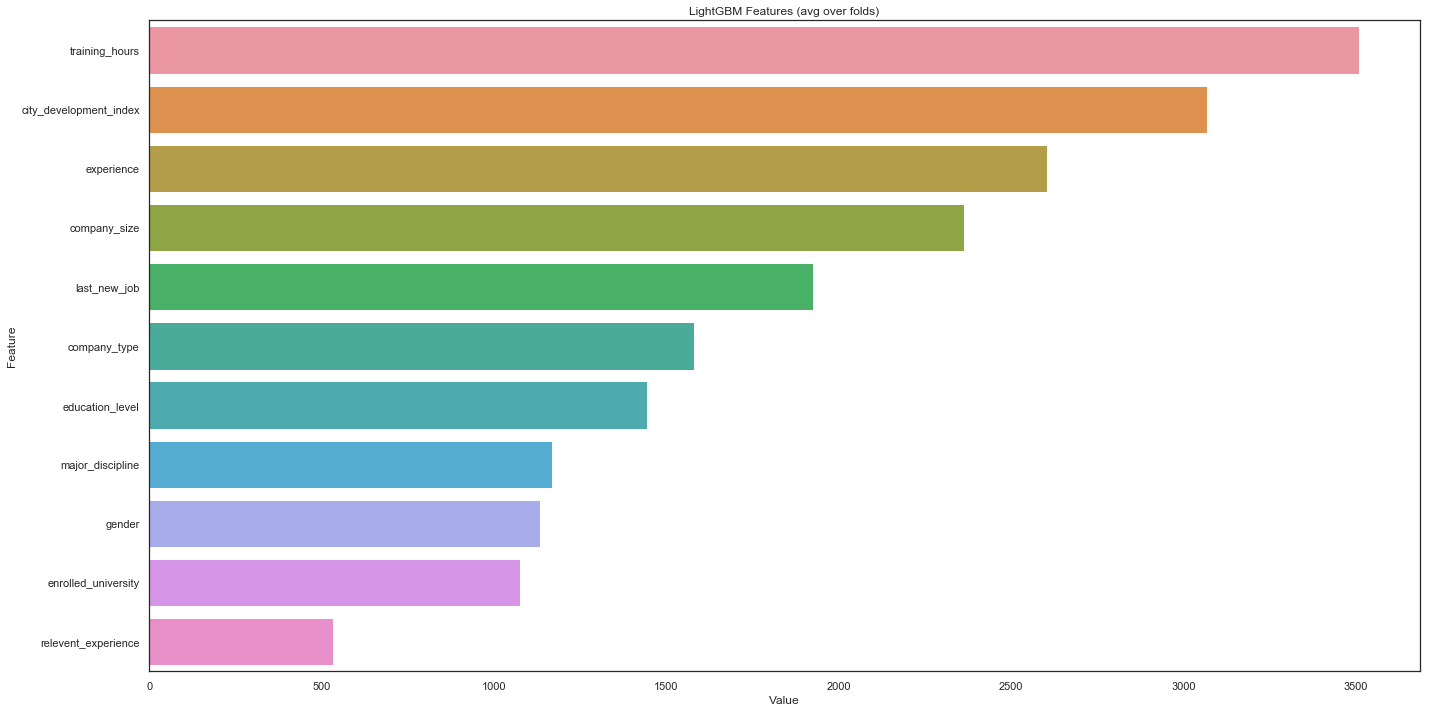

<Figure size 432x288 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf_LGBM.feature_importances_,x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')